In [1]:

import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [4,2.5]
plt.rc('font', family='Times New Roman')

markers = list('ov^<>12348sp*hH+xXDd|_.,')+[i for i in range(12)]

colors = ["#0077b4", "#0096c5", "#00b4d6", "#3ecae3", "#8de0ee"]


# if not os.path.abspath('.').endswith('netscope'):
#     root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('.'))))
#     os.chdir(root_path)
#     # from analysis.load import Loader
#     # from evaluation.intsight.IntSight import IntSight

In [2]:
mpl.rcParams.update({
    'axes.spines.right': False,
    'axes.spines.top': False,
})
plt.rc('figure', figsize=[6,3.5])
plt.rc('font', family='Times New Roman', size=18)

def draw(plot_df, ks=[1,2,3,5,10]):
    bar_width = 1/(len(plot_df)+3)
    xs = np.arange(len(plot_df))
    plt.xticks(xs+0.3, plot_df.name)
    plt.grid(axis='y')
    for ik, k in enumerate(ks):
        plt.bar(xs, plot_df[f"t{k}"], width=bar_width, label=f'top {k}', color=colors[ik], zorder=10)
        xs = xs + bar_width
    plt.legend(loc="lower left", prop={'size': 12}).set_zorder(20)
    plt.ylabel("Precision (%)")
    plt.subplots_adjust(right = 1, top=1)

In [4]:
burst = pd.DataFrame([
    dict(name="NetScope", t1=71.4, t2=85.7, t3=100),
    dict(name="IntSight", t1=14.3, t2=42.9, t3=85.7, t5=85.7, t10=85.7),
    dict(name="SpiderMon", t1=14.3, t2=14.3, t3=28.6, top10=100),
    dict(name="SyNDB", t1=57.1, t2=85.7, t3=100),
]).fillna(100)

L = 21/100
burst = pd.DataFrame([
    dict(name="NetScope", t1=19/L, t2=21/L),
    dict(name="IntSight", t1=5/L, t2=9/L, t3=14/L, t5=14/L, t10=14/L),
    dict(name="SpiderMon", t1=1/L, t2=3/L, t3=4/L, t5=7/L, t10=21/L),
    dict(name="SyNDB", t1=16/L, t2=20/L, t3=20/L, t5=21/L),
]).fillna(100)

L = 48/100
burst = pd.DataFrame([
    dict(name="NetScope", t1=36/L, t2=41/L, t3=44/L, t5=46/L, t10=46/L),
    dict(name="SpiderMon", t1=23/L, t2=28/L, t3=31/L, t5=34/L, t10=48/L),
    dict(name="IntSight", t1=5/L, t2=19/L, t3=29/L, t5=39/L, t10=44/L),
    dict(name="SyNDB", t1=21/L, t2=35/L, t3=38/L, t5=45/L, t10=48/L),
]).fillna(100)
burst

,name,t1,t2,t3,t5,t10
0,NetScope,75.000000,85.416667,91.666667,95.833333,95.833333
1,SpiderMon,47.916667,58.333333,64.583333,70.833333,100.000000
2,IntSight,10.416667,39.583333,60.416667,81.250000,91.666667
3,SyNDB,43.750000,72.916667,79.166667,93.750000,100.000000


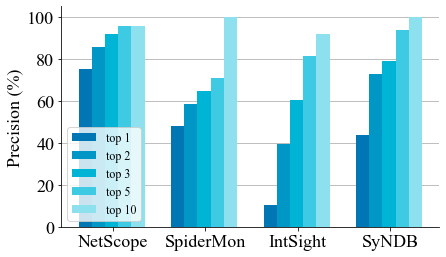

In [5]:
draw(burst, ks=[1,2,3,5,10][:5])
plt.savefig('topk_burst.pdf')
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

# plt.savefig('topk_burst.png')

In [6]:
L = 24/100
ecmp = pd.DataFrame([
    dict(name="NetScope", t1=21/L, t2=24/L),
    dict(name="SpiderMon", t1=9/L, t2=16/L, t3=23/L, t5=24/L),
    dict(name="IntSight", t1=7/L, t2=12/L, t3=13/L, t5=23/L, t10=23/L),
    dict(name="SyNDB", t1=1/L, t2=2/L, t3=3/L, t5=5/L, t10=20/L),
]).fillna(100)
ecmp

,name,t1,t2,t3,t5,t10
0,NetScope,87.500000,100.000000,100.000000,100.000000,100.000000
1,SpiderMon,37.500000,66.666667,95.833333,100.000000,100.000000
2,IntSight,29.166667,50.000000,54.166667,95.833333,95.833333
3,SyNDB,4.166667,8.333333,12.500000,20.833333,83.333333


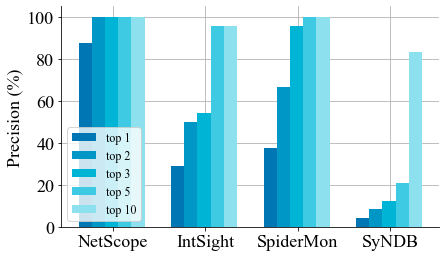

In [72]:
draw(ecmp)
plt.savefig('topk_ecmp.pdf')